In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
admissions = pd.read_csv('mimiciii/ADMISSIONS.csv')
admissions['ADMITTIME'] = pd.to_datetime(admissions['ADMITTIME'])
admissions['DEATHTIME'] = pd.to_datetime(admissions['DEATHTIME'])
admissions['DISCHTIME'] = pd.to_datetime(admissions['DISCHTIME'])

admissions

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaT,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0


In [111]:
#comment comparer des valeurs manquantes  np.nan (le == de fonctionne pas )
a = admissions.iloc[0][5]
a

NaT

In [112]:
admissions["DEATHTIME"].isna().sum()
#nombre de valeurs manquantes pour deathtime

53122

In [113]:
dead_admissions = admissions[admissions["DEATHTIME"].notna()]
dead_admissions

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
9,30,31,128652,2108-08-22 23:27:00,2108-08-30 15:00:00,2108-08-30 15:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,STATUS EPILEPTICUS,1,1
57,55,56,181711,2104-01-02 02:01:00,2104-01-08 10:30:00,2104-01-08 10:30:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,NaN,NOT SPECIFIED,NaN,WHITE,2104-01-01 23:59:00,2104-01-02 03:33:00,HEAD BLEED,1,1
63,61,61,189535,2119-01-04 18:12:00,2119-02-03 01:35:00,2119-02-03 01:35:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Private,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,NON-HODGKINS LYMPHOMA;FEBRILE;NEUTROPENIA,1,1
70,68,67,155252,2157-12-02 00:45:00,2157-12-02 03:55:00,2157-12-02 03:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,NaN,JEWISH,SINGLE,WHITE,2157-12-01 20:45:00,2157-12-02 00:55:00,SUBARACHNOID HEMORRHAGE,1,1
88,86,84,166401,2196-04-14 04:02:00,2196-04-17 13:42:00,2196-04-17 13:42:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,NaN,OTHER,MARRIED,WHITE,2196-04-13 22:23:00,2196-04-14 04:31:00,"GLIOBLASTOMA,NAUSEA",1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58927,58550,98669,108710,2147-04-07 15:09:00,2147-04-14 10:00:00,2147-04-14 10:00:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,UNOBTAINABLE,NaN,UNABLE TO OBTAIN,2147-04-07 13:31:00,2147-04-07 16:55:00,SUBARACHNOID HEMORRHAGE,1,1
58957,58580,98753,185764,2172-02-11 21:26:00,2172-03-02 08:00:00,2172-03-02 08:00:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,2172-02-11 16:49:00,2172-02-11 22:52:00,R/O METASTASIS,1,1
58966,58589,98768,127022,2112-09-15 09:45:00,2112-09-17 08:20:00,2112-09-17 08:20:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,JEWISH,WIDOWED,WHITE,2112-09-15 09:30:00,2112-09-15 11:46:00,LEUKOCYTOSIS,1,1
58970,58593,98797,105447,2132-12-24 20:06:00,2132-12-25 12:00:00,2132-12-25 12:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2132-12-24 18:53:00,2132-12-24 21:41:00,ALTERED MENTAL STATUS,1,1


In [114]:
dead_admissions[dead_admissions['ADMITTIME'] == dead_admissions['DEATHTIME']]
#seulement un seul cas de don d'organe ?????

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
41445,38796,31972,139331,2163-12-23 04:08:00,2163-12-24 04:08:00,2163-12-23 04:08:00,EMERGENCY,PHYS REFERRAL/NORMAL DELI,DEAD/EXPIRED,Private,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,ORGAN DONOR ACCOUNT,1,1


In [120]:
dead_admissions['DELTATIME'] = dead_admissions['DEATHTIME'] - dead_admissions['ADMITTIME']

def convert_to_hours(delta):
    total_seconds = delta.total_seconds()
    hours = str(int(total_seconds // 3600)).zfill(2)
    minutes = str(int((total_seconds % 3600) // 60)).zfill(2)
    seconds = str(int(total_seconds % 60)).zfill(2)
    return int(total_seconds)

dead_admissions['DELTATIME'] = dead_admissions['DELTATIME'].apply(convert_to_hours)
dead_admissions['DELTATIME']


/tmp/ipykernel_81247/433149651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dead_admissions['DELTATIME'] = dead_admissions['DEATHTIME'] - dead_admissions['ADMITTIME']
/tmp/ipykernel_81247/433149651.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dead_admissions['DELTATIME'] = dead_admissions['DELTATIME'].apply(convert_to_hours)


9         660780
57        548940
63       2532180
70         11400
88        294000
          ...   
58927     586260
58957    1679640
58966     167700
58970      57240
58972      47400
Name: DELTATIME, Length: 5854, dtype: int64

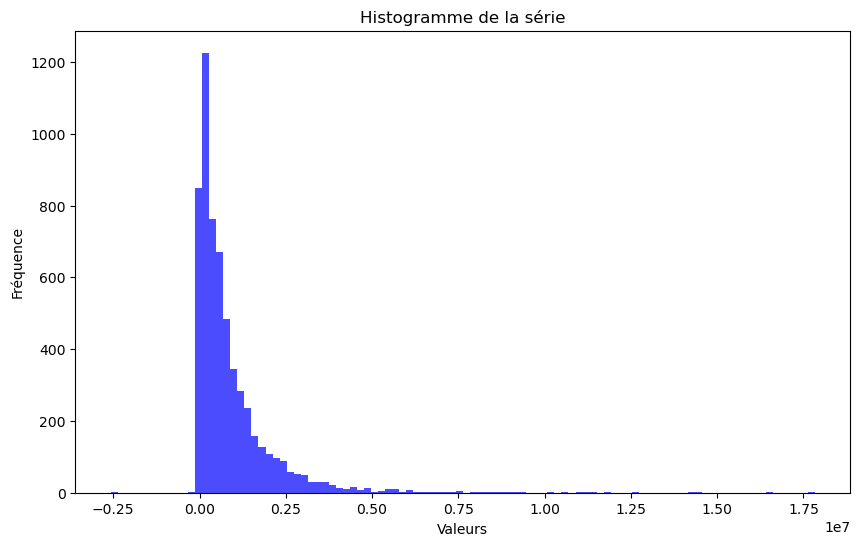

In [121]:
# Affichage de l'histogramme
plt.figure(figsize=(10, 6))
dead_admissions['DELTATIME'].hist(bins=100, alpha=0.7, color='blue', grid=False)

plt.title('Histogramme de la série')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')

plt.show()

In [130]:
dead_admissions[dead_admissions['DELTATIME'] <= 0]['DIAGNOSIS'].unique()

array(['ORGAN DONOR ACCOUNT', 'DISSECTING ANEURYSIM',
       'RESPIRATORY DISTRESS', 'NEWBORN', 'STROKE;TELEMETRY',
       'PANCREATITIS', 'MYOCARDIAL INFARCTION\\CATH', 'HEAD BLEED',
       'HYPOTENSION', 'HYPERKALEMIA', 'SEPSIS', 'DONOR ACCOUNT',
       'HEPATIC ENCEPHALOPATHY', 'HEAD INJURY;S/P BICYCLIST ACCIDENT',
       'VAGINAL BLEED', 'INTRACRANIAL HEMORRHAGE', 'S/P MI',
       'S/P NON Q MI\\CATH', 'GASTROINTESTINAL BLEED',
       'ACUTE MYOCARDIAL INFARCTION\\CATH', 'S/P FALL',
       'MASSIVE CEREBRAL HEMORRHAGE',
       'STATUS POST MOTOR VEHICLE ACCIDENT WITH INJURIES',
       'S/P FALL,SDH,SAH', 'TRAUMA', 'SUBDURAL HEMATOMA;GI BLEED',
       'SEIZURES', 'ACUTE RESPIRATORY DISTRESS SYNDROME',
       'FEVER;ACUTE RESPIRATORY FAILURE', 'INTERCRANIAL BLEED',
       'CLOSTRIDIA NECROSIS', 'CIRRHOSIS', 'MVA',
       'ABDOMINAL AORTIC ANEURYSM', 'GUN SHOT WOUND',
       'CORONARY ARTERY DISEASE\\CATH', 'CARDIAC ARREST', 'R/O UROSEPSIS',
       'MENTAL STATUS CHANGES', 'GROSS HEMA